In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
data=pd.read_csv('election2024.csv')

In [6]:
data.head()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  company_type         879 non-null    object 
 15  weight1              1600 non-null   f

In [10]:
data.isnull().sum()

id                       0
sex                      0
age                      0
federal_district         0
type_of_city             0
knows_election_date      0
will_vote                0
candidate                0
television_usage         0
internet_usage           0
education                0
income                   0
employment               0
job_type               908
company_type           721
weight1                  0
dtype: int64

The dataset consists of 1,600 entries and 16 columns. Here's a brief overview:

Columns:
id: Unique identifier for each respondent.
sex: Gender of the respondent.
age: Age of the respondent.
federal_district: The federal district where the respondent resides.
type_of_city: The type of city (village, small town, large city, etc.).
knows_election_date: Whether the respondent knows the correct date of the election.
will_vote: The respondent's intention to vote.
candidate: The candidate the respondent intends to vote for.
television_usage: Frequency of television usage.
internet_usage: Frequency of internet usage.
education: Respondent's educational background.
income: Income level of the respondent.
employment: Employment status.
job_type: Type of job (only partially filled).
company_type: Type of company (only partially filled).
weight1: A weighting factor.
Some columns have missing values, particularly job_type and company_type

In [11]:
categorical_columns = [
    'sex', 'federal_district', 'type_of_city', 'knows_election_date', 
    'will_vote', 'candidate', 'television_usage', 'internet_usage', 
    'education', 'income', 'employment'
]

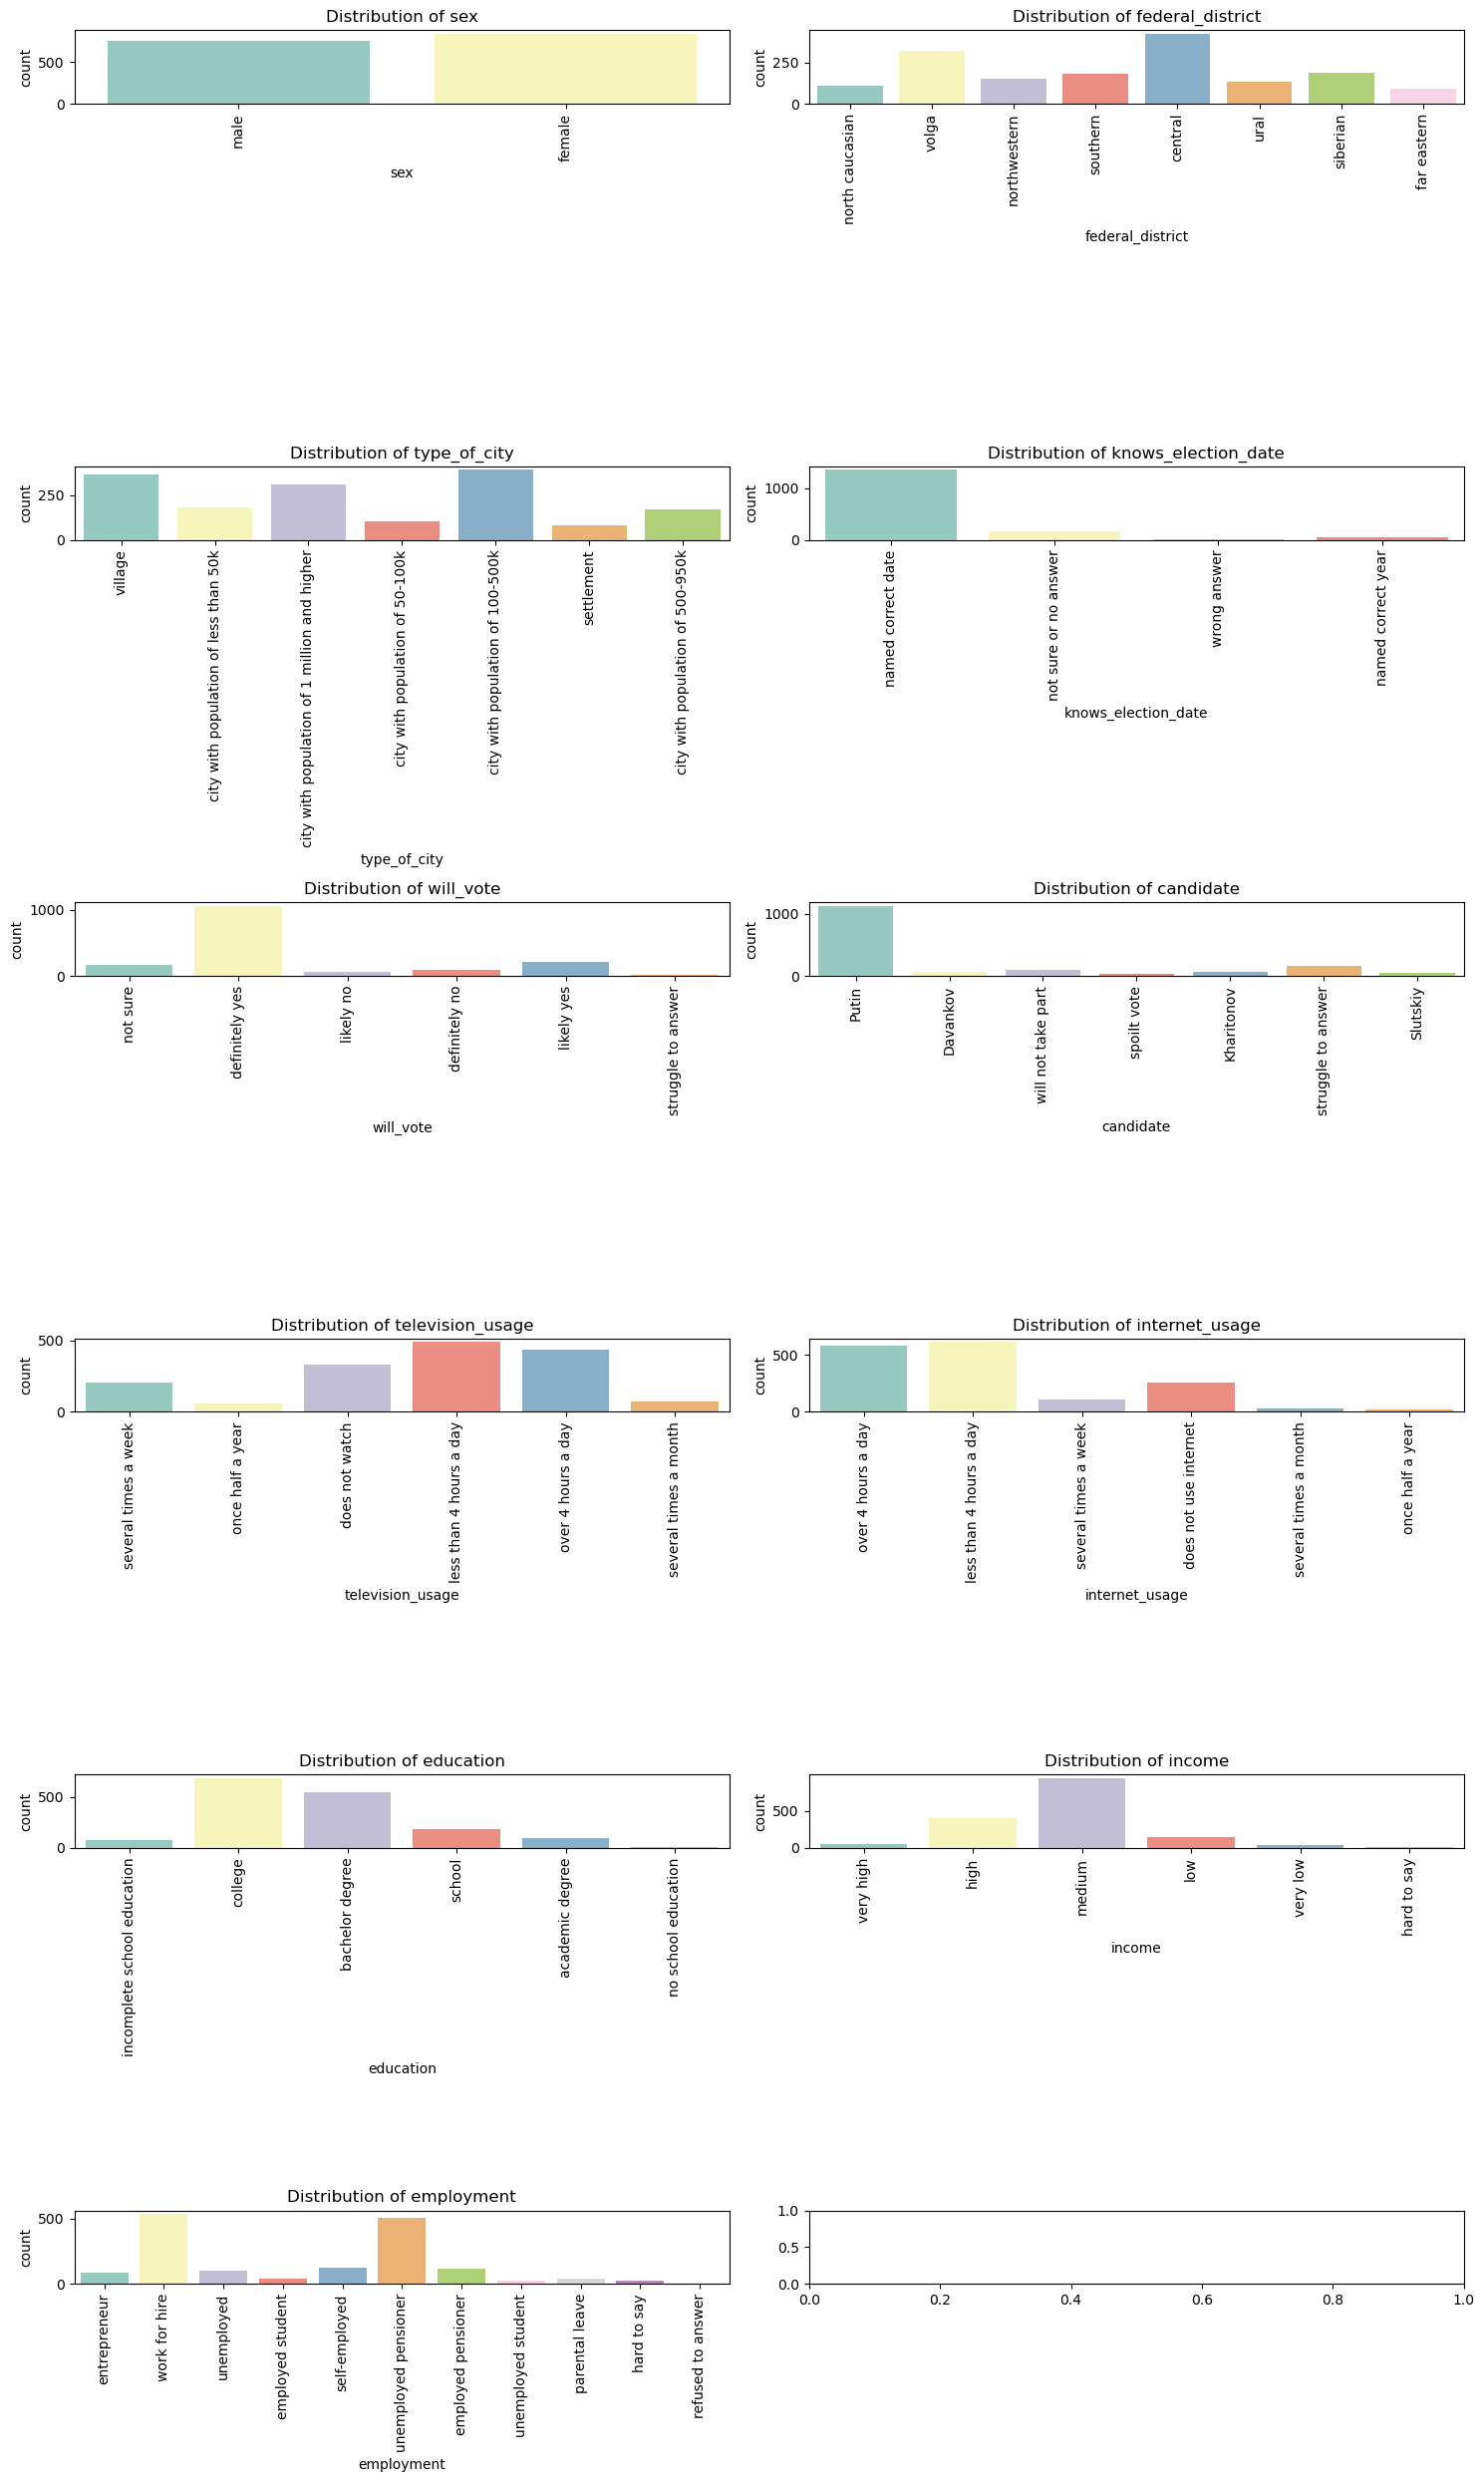

In [12]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15, 25))

for i, col in enumerate(categorical_columns):
    sns.countplot(data=data, x=col, ax=axes[i//2, i%2], palette="Set3")
    axes[i//2, i%2].set_title(f'Distribution of {col}')
    axes[i//2, i%2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

The visualizations show the distribution of various categorical variables in the dataset:

Sex: The distribution of respondents by gender.

Federal District: How respondents are distributed across different federal districts.

Type of City: The types of cities or areas where respondents live.

Knowledge of Election Date: Whether respondents know the correct election date.

Intention to Vote: Respondents' intentions regarding voting.

Candidate Preference: The candidates respondents intend to vote for.

Television Usage: The frequency of respondents' television usage.

Internet Usage: The frequency of respondents' internet usage.

Education: The education levels of respondents.

Income: The income levels of respondents.

Employment Status: Respondents' employment statuses.


In [13]:
# Converting categorical data to numerical for correlation
data['will_vote_numeric'] = data['will_vote'].map({
    'definitely yes': 1, 
    'probably yes': 0.75, 
    'not sure': 0.5, 
    'probably no': 0.25, 
    'definitely no': 0
})

In [14]:
income_order = ['very low', 'low', 'medium', 'high', 'very high']
education_order = ['incomplete school education', 'school education', 'college', 'bachelor degree', 'masters degree', 'phd']

data['income_numeric'] = data['income'].apply(lambda x: income_order.index(x) if x in income_order else None)
data['education_numeric'] = data['education'].apply(lambda x: education_order.index(x) if x in education_order else None)



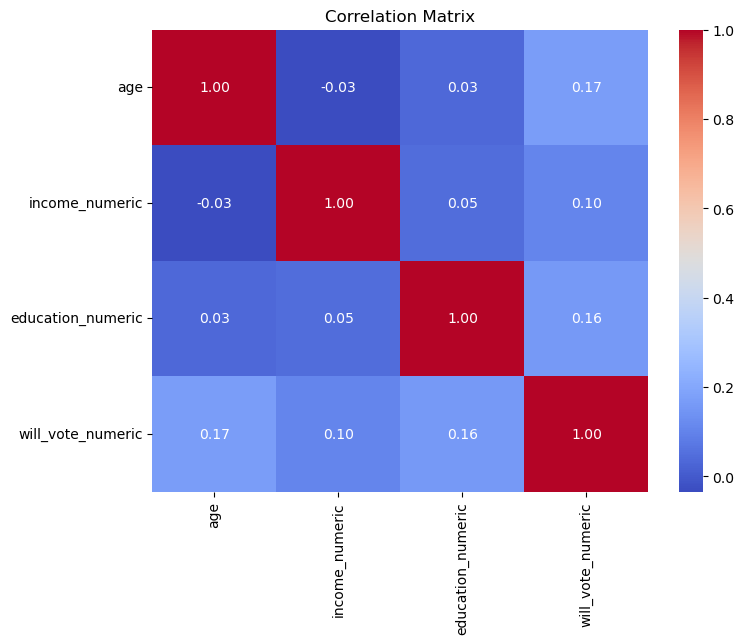

In [15]:
corr_columns = ['age', 'income_numeric', 'education_numeric', 'will_vote_numeric']
corr_matrix = data[corr_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The heatmap reveals correlations between age, income, education, and voting intention.

Age and income have a weak positive correlation, as do age and education.

Voting intention (will_vote_numeric) has a slight positive correlation with income and education, suggesting that higher income and education levels may be associated with a stronger intention to vote.

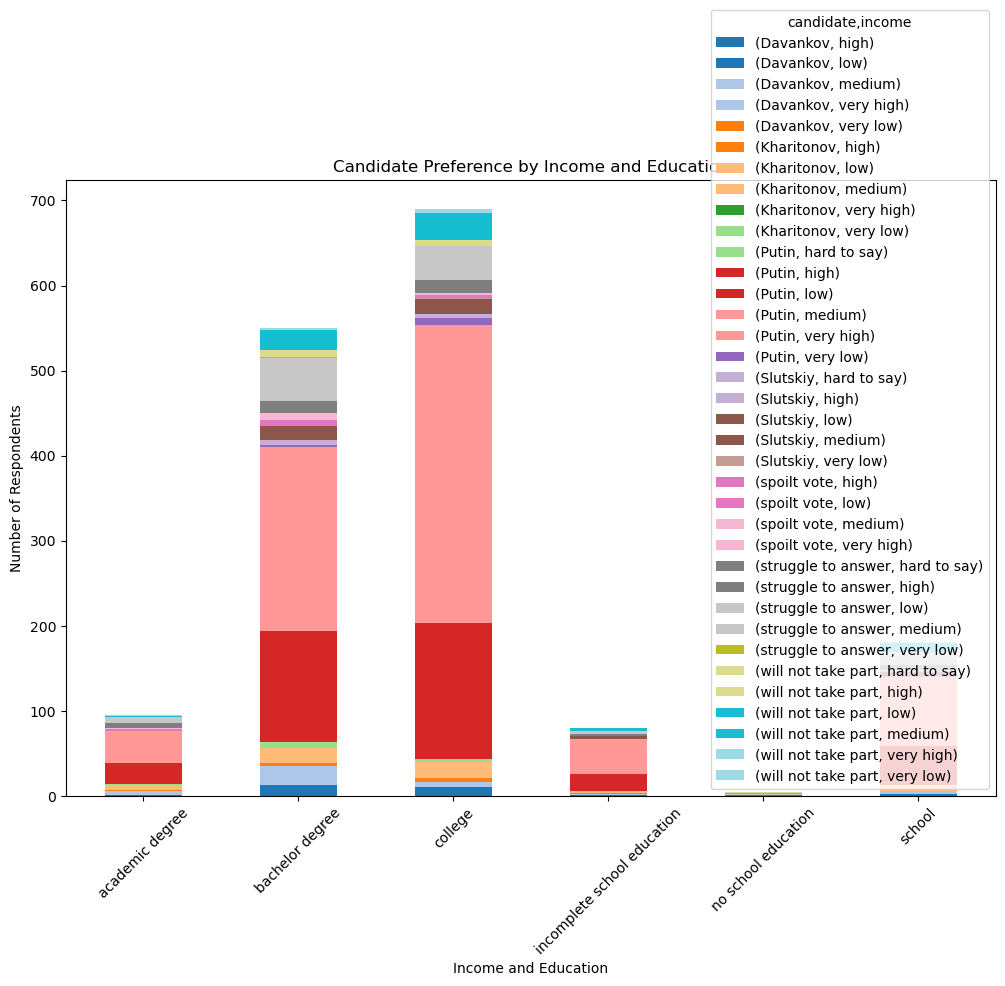

In [16]:
# Explore candidate preference based on income and education
candidate_income_education = data.groupby(['candidate', 'income', 'education']).size().unstack(fill_value=0)

candidate_income_education.T.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Candidate Preference by Income and Education')
plt.ylabel('Number of Respondents')
plt.xlabel('Income and Education')
plt.xticks(rotation=45)
plt.show()

The stacked bar chart shows how candidate preferences vary across different income and education levels.

Certain candidates appear to have more support among respondents with higher income and education, while others are more popular among lower-income or less-educated respondents.